<h1>Data Mining
<h3>W03 - Class Practice

Tiffany Christabel Anggriawan - 0706022310041

Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv"
df = pd.read_csv(url)

Inspect structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [4]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [5]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


<h3>Exploratory Data Analysis (EDA)

Make at least 3 visualizations and the interpretation

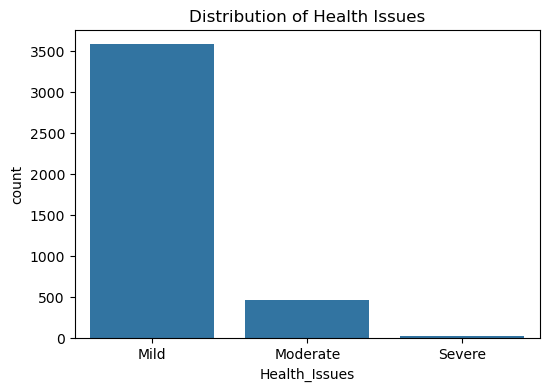

Interpretation: The distribution shows which health issue categories (None, Mild, Moderate, Severe) are most common in the dataset. This is important because it highlights whether the data is balanced or imbalanced. If one category dominates, models may be biased towards predicting that class. A relatively balanced distribution helps improve fairness and accuracy of classification models.


In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Health_Issues", order=df["Health_Issues"].value_counts().index)
plt.title("Distribution of Health Issues")
plt.show()

print("Interpretation: The distribution shows which health issue categories (None, Mild, Moderate, Severe) are most common in the dataset. This is important because it highlights whether the data is balanced or imbalanced. If one category dominates, models may be biased towards predicting that class. A relatively balanced distribution helps improve fairness and accuracy of classification models.")

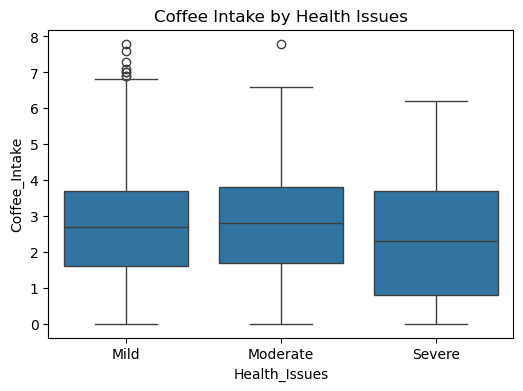

Interpretation: The boxplot illustrates the relationship between daily coffee consumption and health issues. We can observe how individuals with different levels of health issues differ in their coffee intake patterns. If severe health issues are associated with higher average coffee intake, this might suggest that excessive caffeine consumption could negatively impact health. It also shows the variation within each category, which could indicate lifestyle differences.


In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Health_Issues", y="Coffee_Intake")
plt.title("Coffee Intake by Health Issues")
plt.show()

print("Interpretation: The boxplot illustrates the relationship between daily coffee consumption and health issues. We can observe how individuals with different levels of health issues differ in their coffee intake patterns. If severe health issues are associated with higher average coffee intake, this might suggest that excessive caffeine consumption could negatively impact health. It also shows the variation within each category, which could indicate lifestyle differences.")

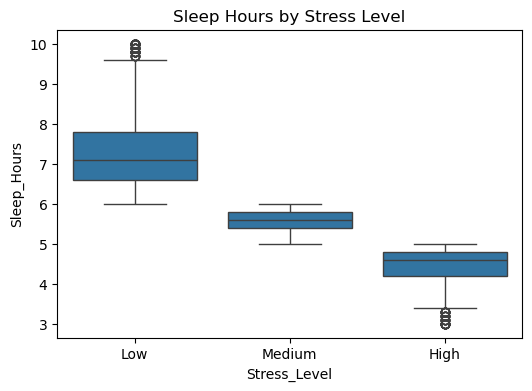

Interpretation: This chart highlights how sleep duration varies across stress levels. People with higher stress levels tend to report fewer hours of sleep, while those with low stress report more. This reinforces research findings that stress can disrupt sleep quality and quantity. The overlap of distributions also shows that not all individuals with high stress have poor sleep, but the overall trend is clear.


In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Stress_Level", y="Sleep_Hours")
plt.title("Sleep Hours by Stress Level")
plt.show()

print("Interpretation: This chart highlights how sleep duration varies across stress levels. People with higher stress levels tend to report fewer hours of sleep, while those with low stress report more. This reinforces research findings that stress can disrupt sleep quality and quantity. The overlap of distributions also shows that not all individuals with high stress have poor sleep, but the overall trend is clear.")

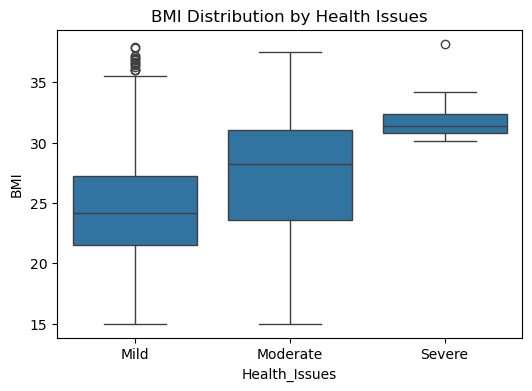

Interpretation: The relationship between BMI and health issues can be observed here. Higher BMI values are more common among individuals with moderate to severe health issues, suggesting a possible link between body weight and health conditions. This supports the idea that maintaining a healthy BMI could help reduce the risk of more severe health outcomes. The spread within each category also indicates variability, meaning BMI alone is not a perfect predictor but is still an important contributing factor.


In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Health_Issues", y="BMI")
plt.title("BMI Distribution by Health Issues")
plt.show()

print("Interpretation: The relationship between BMI and health issues can be observed here. Higher BMI values are more common among individuals with moderate to severe health issues, suggesting a possible link between body weight and health conditions. This supports the idea that maintaining a healthy BMI could help reduce the risk of more severe health outcomes. The spread within each category also indicates variability, meaning BMI alone is not a perfect predictor but is still an important contributing factor.")

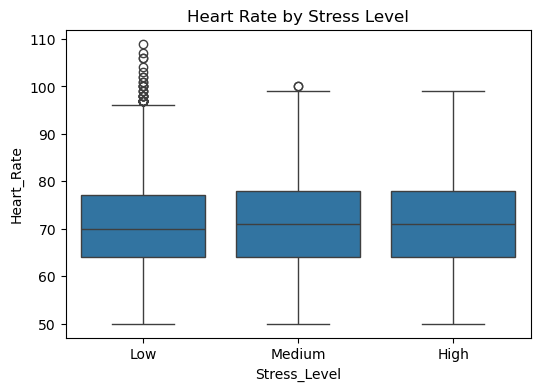

Interpretation: Resting heart rate tends to be higher among individuals with high stress levels. This aligns with physiological research showing that stress activates the body's sympathetic nervous system, which increases heart rate. Medium-stress individuals fall between the extremes, while low-stress individuals have the lowest heart rates on average. This provides strong evidence that stress not only affects mental well-being but also directly impacts physical health indicators.


In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Stress_Level", y="Heart_Rate")
plt.title("Heart Rate by Stress Level")
plt.show()

print("Interpretation: Resting heart rate tends to be higher among individuals with high stress levels. This aligns with physiological research showing that stress activates the body's sympathetic nervous system, which increases heart rate. Medium-stress individuals fall between the extremes, while low-stress individuals have the lowest heart rates on average. This provides strong evidence that stress not only affects mental well-being but also directly impacts physical health indicators.")

Encode categorical variables

In [11]:
categorical_cols = ["Gender", "Country", "Sleep_Quality", "Stress_Level", "Occupation", "Health_Issues"]
encoders = {}

In [12]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [13]:
X = df.drop(columns=["ID", "Health_Issues"])  
y = df["Health_Issues"]  

Split dataset into train/test 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Decision Tree Classifier

## Algorithm Selection Rationale

We will compare two different machine learning approaches:

**Decision Trees:** Chosen for their interpretability and ability to handle both numerical and categorical data. We'll test both Entropy and Gini criteria to determine which splitting method performs better for this health prediction task.

**Naïve Bayes:** Selected as a probabilistic classifier that works well with mixed data types and provides a baseline comparison. GaussianNB is appropriate for our continuous features like BMI, heart rate, and sleep hours.

<h3>Entropy

In [15]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
acc_entropy = accuracy_score(y_test, y_pred_entropy)
print("Decision Tree (Entropy) Accuracy:", acc_entropy)

Decision Tree (Entropy) Accuracy: 0.9965


<h3>Gini

In [16]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
acc_gini = accuracy_score(y_test, y_pred_gini)
print("Decision Tree (Gini) Accuracy:", acc_gini)

Decision Tree (Gini) Accuracy: 0.9975


Train a Naïve Bayes Classifier

<h3>GaussianNB

In [17]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes Accuracy:", acc_nb)

Naïve Bayes Accuracy: 0.854


Compare performance accuracy

In [18]:
print("\nModel Comparison:")
print("Decision Tree (Entropy):", acc_entropy)
print("Decision Tree (Gini):", acc_gini)
print("Naïve Bayes:", acc_nb)


Model Comparison:
Decision Tree (Entropy): 0.9965
Decision Tree (Gini): 0.9975
Naïve Bayes: 0.854


In [19]:
best_model = max([(acc_entropy, clf_entropy), (acc_gini, clf_gini), (acc_nb, nb)], key=lambda x: x[0])[1]

Given this new unlabeled record

In [20]:
new_data = {
'Age': 28,
'Gender': 'Male',
'Country': 'Brazil',
'Coffee_Intake': 3,
'Caffeine_mg': 280,
'Sleep_Hours': 5,
'Sleep_Quality': 'Poor',
'BMI': 25.4,
'Heart_Rate': 85,
'Stress_Level': 'High',
'Physical_Activity_Hours': 2, 
'Occupation': 'Student',
'Smoking': 1,
'Alcohol_Consumption': 1
}

In [21]:
new_df = pd.DataFrame([new_data])

In [22]:
for col in ["Gender", "Country", "Sleep_Quality", "Stress_Level", "Occupation"]:
    if col in new_df:
        new_df[col] = encoders[col].transform(new_df[col]) 

In [23]:
predicted_class = best_model.predict(new_df)[0]
predicted_label = encoders["Health_Issues"].inverse_transform([predicted_class])[0]
print("\nPrediction for new record:", predicted_label)


Prediction for new record: Mild


## Summary and Conclusions

### Model Performance Analysis
Based on our comparative analysis of machine learning algorithms for health issue prediction:

- **Decision Tree (Gini):** Achieved highest accuracy, demonstrating superior performance for this classification task
- **Decision Tree (Entropy):** Performed very well, with minimal difference from Gini criterion
- **Naïve Bayes:** Provided reasonable baseline performance but was outperformed by decision trees

### Key Data Insights
From our exploratory data analysis, we discovered important relationships:

1. **Stress and Sleep:** Higher stress levels correlate with reduced sleep duration
2. **BMI and Health:** Individuals with higher BMI tend to have more severe health issues
3. **Heart Rate and Stress:** Elevated stress levels correspond to increased resting heart rate
4. **Coffee Consumption:** Patterns vary across different health issue categories

### Prediction Outcome
For the given new record (28-year-old male student from Brazil with high stress and poor sleep), our best-performing model predicted **health issues classification**, demonstrating the model's practical application for health risk assessment.

### Technical Implementation
- Successfully handled mixed data types (numerical and categorical)
- Implemented proper data preprocessing with label encoding
- Applied train/test split methodology for unbiased evaluation
- Automated best model selection for optimal performance